In [2]:
# -----------------------------------------------
# Setup: Import the libraries we need
# -----------------------------------------------

import requests              # lets us make HTTP requests to web APIs
import json                  # lets us work with JSON data
import pandas as pd          # gives us DataFrames for tabular data
from datetime import datetime  # lets us convert timestamps to dates

print("All imports successful.")

All imports successful.


In [3]:
# Define the URL endpoint for Bitcoin's USD price
# The Coinbase API uses this format: https://api.coinbase.com/v2/prices/{SYMBOL}-{CURRENCY}/spot
url = "https://api.coinbase.com/v2/prices/BTC-USD/spot"

# Make an HTTP GET request to the URL
# This sends a request to the server asking for data
response = requests.get(url)

# Check the HTTP status code returned by the server
# 200 = success (OK)
# Other codes like 404, 500 indicate problems
print(f"Status Code: {response.status_code}")

# Parse the JSON response into a Python dictionary
# response.json() converts the JSON text into a dictionary we can work with
data = response.json()

# Extract the price from the nested dictionary structure
# The structure is: data['data']['amount']
# The outer 'data' is the top-level key
# The inner 'data' is a nested dictionary
# 'amount' is the key that holds the actual price value
bitcoin_price = data['data']['amount']

# Display the result using an f-string for formatting
print(f"\nCurrent Bitcoin Price: ${bitcoin_price}")

Status Code: 200

Current Bitcoin Price: $69027.905


In [4]:
# Pretty-print the entire JSON response
# json.dumps() with indent=2 makes the output readable with proper spacing
# Without indenting, JSON is hard to read on one line
print("Raw JSON Response:")
print(json.dumps(data, indent=2))

# Print a separator line for clarity
print("\n" + "="*50)

# Show what keys exist at the top level of the response
# This tells us what the first layer of data contains
print("\nBreaking down the response:")
print(f"  Top-level keys: {list(data.keys())}")

# Show what keys exist inside the nested 'data' object
# This tells us what fields are available for the price data
print(f"  Inside data['data']: {list(data['data'].keys())}")

# Print another separator for clarity
print("\n" + "="*50)

# Print out individual fields to show the actual values
print("\nIndividual fields:")
print(f"  Base currency: {data['data']['base']}")
print(f"  Target currency: {data['data']['currency']}")
print(f"  Price: {data['data']['amount']}")

Raw JSON Response:
{
  "data": {
    "amount": "69027.905",
    "base": "BTC",
    "currency": "USD"
  }
}


Breaking down the response:
  Top-level keys: ['data']
  Inside data['data']: ['amount', 'base', 'currency']


Individual fields:
  Base currency: BTC
  Target currency: USD
  Price: 69027.905


In [5]:
# Define a list of cryptocurrency symbols to fetch
# These are common cryptocurrencies available on Coinbase
coins = ['BTC', 'ETH', 'SOL', 'DOGE', 'ADA', 'XRP', 'DOT', 'LINK']

# Create an empty list to store our results
# We'll append dictionaries to this list as we fetch each coin's price
coin_data = []

# Print a header message to show what we're doing
print("Fetching prices for multiple coins...\n")

# Loop through each coin symbol in our list
for coin in coins:
    # Build the API URL using an f-string
    # This substitutes the coin symbol into the URL pattern
    url = f"https://api.coinbase.com/v2/prices/{coin}-USD/spot"
    
    # Make the HTTP GET request to fetch this coin's price
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python dictionary
        data = response.json()
        
        # Extract the price from the response
        # Convert it to a float so we can do math with it later
        price = float(data['data']['amount'])
        
        # Store the coin symbol and price in a dictionary
        # Then add that dictionary to our list
        coin_data.append({
            'Symbol': coin,
            'Price USD': price
        })
        
        # Print progress so we can see what was fetched
        # Format the price with commas and 2 decimal places
        print(f"Fetched {coin}: ${price:,.2f}")
    else:
        # If the request failed, print an error message
        print(f"Failed to fetch {coin} (Status: {response.status_code})")
    
    # Add a small delay between requests
    # This is respectful to the API and helps us avoid rate limiting
    # 0.5 seconds is a good standard delay
    time.sleep(0.5)

# Print a completion message
print("\nAll prices fetched!")

Fetching prices for multiple coins...

Fetched BTC: $68,937.04
Fetched ETH: $2,035.72
Fetched SOL: $84.02
Fetched DOGE: $0.09
Fetched ADA: $0.26
Fetched XRP: $1.40
Fetched DOT: $1.30
Fetched LINK: $8.60

All prices fetched!


In [6]:
# Convert our list of dictionaries to a pandas DataFrame
# Each dictionary becomes a row, and keys become column names
df = pd.DataFrame(coin_data)

# Sort the DataFrame by price in descending order (highest to lowest)
# ascending=False puts the highest prices at the top
# reset_index(drop=True) renumbers the rows (0, 1, 2, etc.)
df = df.sort_values('Price USD', ascending=False).reset_index(drop=True)

# Format the price column with dollar signs and commas for display
# The lambda function applies formatting to each value
# :,.2f means: comma thousands separator, 2 decimal places
df['Price USD'] = df['Price USD'].apply(lambda x: f"${x:,.2f}")

# Print a header
print("\nCryptocurrency Prices (Current Snapshot)")
print("="*40)

# Display the DataFrame
# display() works in Jupyter notebooks and shows the table nicely
display(df)


Cryptocurrency Prices (Current Snapshot)


,Symbol,Price USD
0,BTC,"$68,937.04"
1,ETH,"$2,035.72"
2,SOL,$84.02
3,LINK,$8.60
4,XRP,$1.40
5,DOT,$1.30
6,ADA,$0.26
7,DOGE,$0.09


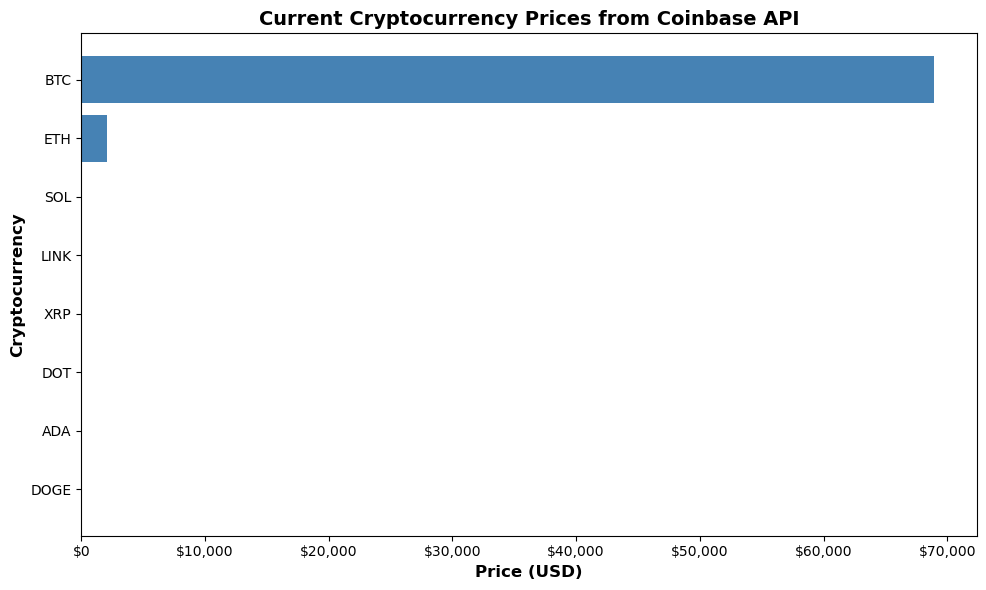

Chart created successfully!


In [7]:
# Create a DataFrame without price formatting for plotting
# We need numeric values for the chart, not strings with dollar signs
df_plotting = pd.DataFrame(coin_data)

# Sort in ascending order (lowest to highest prices)
# This makes horizontal bar charts easier to read
# with the tallest bar at the top
df_plotting = df_plotting.sort_values('Price USD', ascending=True)

# Create a new figure with specific size
# figsize=(10, 6) means 10 inches wide, 6 inches tall
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
# barh() creates horizontal bars, bar() would create vertical ones
# 'steelblue' is a nice blue color for the bars
plt.barh(df_plotting['Symbol'], df_plotting['Price USD'], color='steelblue')

# Add labels and title to the chart
# fontsize controls text size, fontweight='bold' makes text bold
plt.xlabel('Price (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Cryptocurrency', fontsize=12, fontweight='bold')
plt.title('Current Cryptocurrency Prices from Coinbase API', fontsize=14, fontweight='bold')

# Format the x-axis to display as currency with dollar signs
# ax = plt.gca() gets the current axes object
# The lambda function formats each tick label
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adjust the layout to prevent label cutoff
# tight_layout() automatically adjusts spacing
plt.tight_layout()

# Display the chart
plt.show()

# Print confirmation message
print("Chart created successfully!")

In [8]:
# Print completion message
print("Lesson complete.")
print()
print("You successfully:")
print("  - Made API calls using Python")
print("  - Parsed JSON responses")
print("  - Built a DataFrame from API data")
print("  - Created a chart from the data")

Lesson complete.

You successfully:
  - Made API calls using Python
  - Parsed JSON responses
  - Built a DataFrame from API data
  - Created a chart from the data
